# <font color=black> Analysis - FC-based parcellation </font>
<hr style="border:1px solid black">

## <font color=black> <span style="background-color: #A0B0C0"> Imports 

In [5]:
import sys,json
import glob, os
import numpy as np
sys.path.append('/media/miplab-nas2/Data3/BMPD/hc_project/analysis/code/')

from fc_based_parcellation import FC_Parcellation

%matplotlib inline
%load_ext autoreload
%autoreload 2

## <font color=black> <span style="background-color: #A0B0C0"> Initialization

### <font color=#A0B0C0> I Configuration & parameters </font>

In [16]:
with open('../config/config_fc_based_parcellation_NK.json') as config_file:
    config = json.load(config_file) # load config file

### <font color=#A0B0C0> II Class instance </font>

In [17]:
fc_parcellation = FC_Parcellation(config,'spinalcord','brain')

In [18]:
fc_parcellation.compute_voxelwise_correlation(load_from_file=False, mask_source_path=config['main_dir']+config['masks']['spinalcord'],mask_target_path=config['main_dir']+config['masks']['brain'])

COMPUTE VOXELWISE CORRELATION
... Computing correlations for all possibilities
...... Subject P028
...... Subject P030
...... Subject P033
...... Subject P043
...... Subject P047
...... Subject P050
...... Subject P100
...... Subject P105
...... Subject P108
...... Subject P109
...... Subject P001
...... Subject P003
...... Subject P004
...... Subject P005
...... Subject P006
...... Subject P007
...... Subject P008
...... Subject P009
...... Subject P011
...... Subject P013
... Computing mean correlation over subjects
DONE!


DEFINE NUMBER OF CLUSTERS
...Loading k-means parameters
...Computing SSE and silhouette coefficients
......K = 10
......K = 11
......K = 12
......K = 13
......K = 14
......K = 15
......K = 16
......K = 17
......K = 18
......K = 19


/home/kinany/anaconda3/lib/python3.9/site-packages/kneed/knee_locator.py:311: UserWarning: No knee/elbow found
  warnings.warn("No knee/elbow found")


Knee of SSE curve is at K = None
DONE


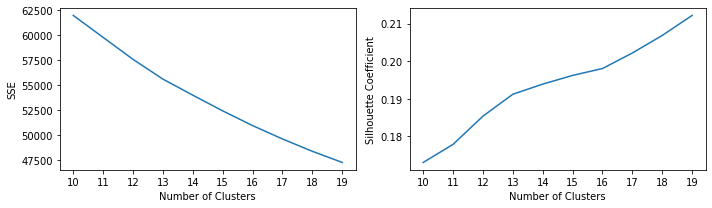

In [19]:
fc_parcellation.define_n_clusters(range(10,20))

In [20]:
fc_parcellation.run_clustering(13)

RUN K-MEANS CLUSTERING FOR K = 13
DONE


In [21]:
fc_parcellation.prepare_seed_map()

PREPARE SEED MAP
DONE


In [23]:
fc_parcellation.prepare_target_maps()

PREPARE BRAIN MAPS
...Compute mean connectivity profiles
...Save as nifti files
DONE


In [44]:
test

NiftiMasker(mask_img='/media/miplab-nas2/Data3/BMPD/hc_project//templates/MNI_hc_project/MNI_T1w_GM_AverageHCs_3mm_bin_corrected.nii')

In [38]:
fc_parcellation.correlations_mean.shape

(8592, 5478)

In [49]:
np.count_nonzero(fc_parcellation.mask_target)

5478